In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from scipy.stats import uniform, randint
%matplotlib inline

##########使用特征融合后的数据进行机器学习方法

导入有涡和无涡数据，去除缺失值。

<AxesSubplot:xlabel='Ū', ylabel='t'>

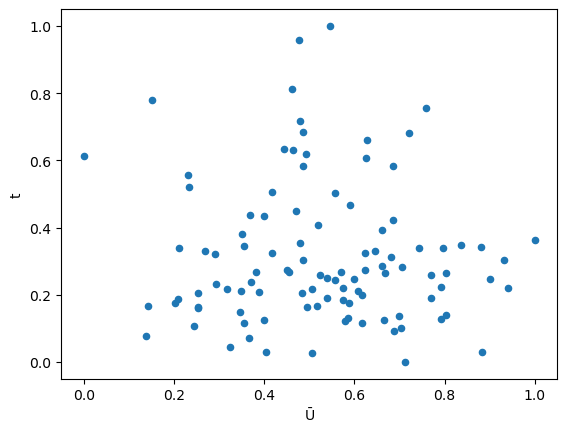

In [27]:
vortex_v=pd.read_excel('C:\\Users\\Desktop\\vortexdata1.xlsx',sheet_name='data2',header=1,usecols='A,B')
vortex_v=vortex_v.dropna()
vortex_u=vortex_v['Ū']
vortex_t=vortex_v['t']
target1=[1]*len(vortex_v)
vortex_v_norm=(vortex_v - vortex_v.min()) / (vortex_v.max() - vortex_v.min())
vortex_v_norm.plot.scatter(x='Ū',y='t')


Index(['Ū.1', 't.1'], dtype='object')
Index(['Ū', 't'], dtype='object')


<AxesSubplot:xlabel='Ū', ylabel='t'>

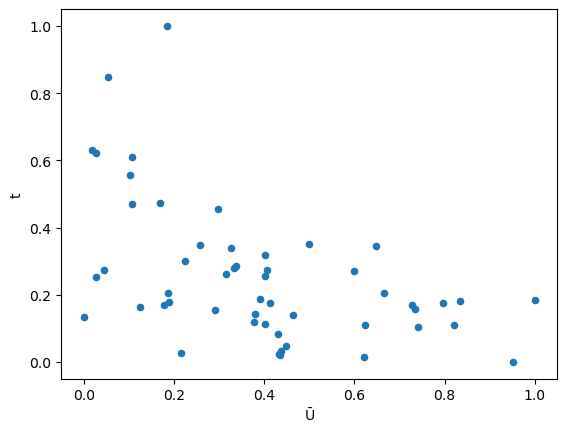

In [28]:
nonvortex_v=pd.read_excel('C:\\Users\\Desktop\\vortexdata1.xlsx',sheet_name='data2',header=1,usecols='C,D')
nonvortex_v=nonvortex_v.replace(0,np.nan)
nonvortex_v=nonvortex_v.dropna()
print(nonvortex_v.columns)
nonvortex_v.columns=['Ū',"t"]
print(nonvortex_v.columns)
nonvortex_u=nonvortex_v['Ū']
nonvortex_t=nonvortex_v['t']
target0=[0]*len(nonvortex_v)
nonvortex_v_norm=(nonvortex_v - nonvortex_v.min()) / (nonvortex_v.max() - nonvortex_v.min())
nonvortex_v_norm.plot.scatter(x='Ū',y='t')

In [29]:
# # 没有导入任何数据所以输出会报错，只是对上述步骤的简单描述
# from sklearn.linear_model import LogisticRegression  # 导入逻辑回归模型 
# clf = LogisticRegression()                           # 创建逻辑回归模型
# # clf
# clf.fit(train_feature,label)                         # fit()训练模型
# predict['label'] = clf.predict(predict_feature)      # 预测label的predict_feature结果


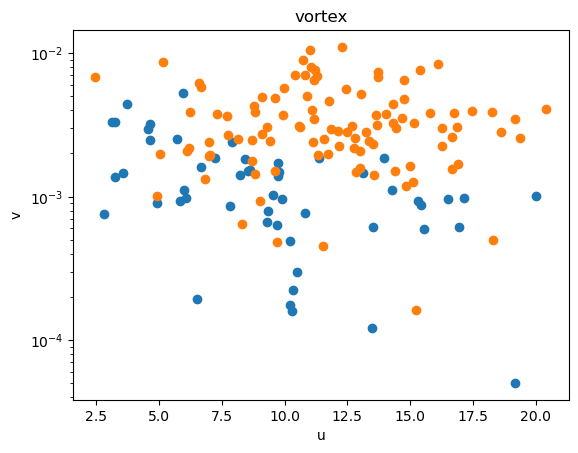

In [30]:
fig=plt.figure()
ax = fig.subplots()
ax.scatter(nonvortex_v['Ū'],nonvortex_v['t'])
ax.scatter(vortex_v['Ū'],vortex_v['t'])
plt.yscale('log')
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_title('vortex')


plt.show()


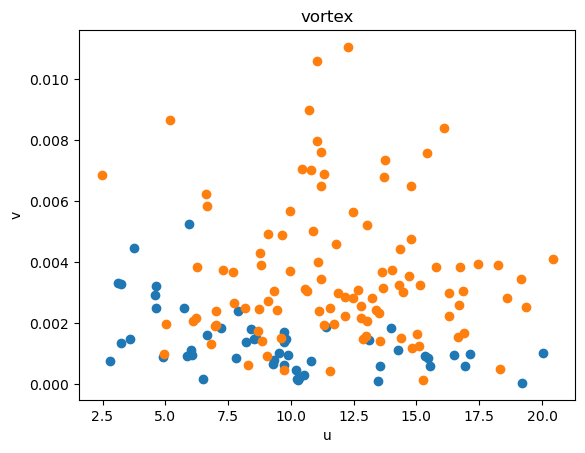

In [31]:
fig=plt.figure()
ax = fig.subplots()
ax.scatter(nonvortex_v['Ū'],nonvortex_v['t'])
ax.scatter(vortex_v['Ū'],vortex_v['t'])

ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_title('vortex')


plt.show()

合并数据集准备分析# 准备特征和标签数据

In [32]:
vortex=pd.concat([vortex_v,nonvortex_v])
target=target1+target0
print(vortex)
print(target)

            Ū         t
1   13.521742  0.002324
3    8.724231  0.002464
4    7.306543  0.003760
5   12.478767  0.002822
6   14.770187  0.006494
..        ...       ...
85   8.420235  0.001817
86  16.939086  0.000616
88   5.855786  0.000925
89   8.612371  0.001532
95   7.234234  0.001855

[155 rows x 2 columns]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


#######SVM方法

In [41]:
from sklearn.model_selection import cross_val_score
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(vortex,target, test_size=0.2, random_state=42)

# # 定义超参数的搜索范围
# param_dist = {'C': uniform(loc=0, scale=10),
#               'kernel': ['linear','sigmoid', 'rbf'],
#               'gamma': uniform(loc=0, scale=10)}

# 创建SVM分类器
svm = SVC()

# # 使用随机搜索进行超参数调整
# random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=200, cv=3)
# random_search.fit(X_train, y_train)

# # 输出最佳超参数组合
# print("最佳超参数组合:", random_search.best_params_)

# # 在测试集上评估模型
# best_model = random_search.best_estimator_
# test_predictions = best_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, test_predictions)
# print("测试集准确率:", test_accuracy)

# 执行交叉验证
scores = cross_val_score(svm, X_train, y_train, cv=10)

# 输出每折交叉验证的准确率
print("Cross-validation scores:", scores)

# 输出平均准确率
print("Average Accuracy:", scores.mean())

Cross-validation scores: [0.53846154 0.53846154 0.76923077 0.76923077 0.75       0.66666667
 0.75       0.91666667 0.83333333 0.5       ]
Average Accuracy: 0.7032051282051281


##########逻辑斯蒂回归

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import cross_val_score
# 创建逻辑斯蒂回归模型
model = LogisticRegression()

# # 定义要调整的超参数分布
# param_dist = {'C': uniform(loc=0, scale=4), 'penalty': ['l1', 'l2']}

# # 执行随机搜索
# random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=200, cv=5)
# random_search.fit(X_train, y_train)

# # 输出最佳参数组合
# print("Best Parameters:", random_search.best_params_)

# # 输出最佳模型的性能
# print("Best Score:", random_search.best_score_)


# 执行交叉验证
scores = cross_val_score(model, X_train, y_train, cv=10)

# 输出每折交叉验证的准确率
print("Cross-validation scores:", scores)

# 输出平均准确率
print("Average Accuracy:", scores.mean())

Cross-validation scores: [0.53846154 0.53846154 0.76923077 0.76923077 0.75       0.75
 0.75       0.91666667 0.83333333 0.5       ]
Average Accuracy: 0.7115384615384615


In [24]:
import scipy.stats as stats
# stats.pointbiserialr(vortex['Fmin'],target)
print(stats.pointbiserialr(vortex['Ū'],target))
stats.pointbiserialr(vortex['t'],target)

# stats.pointbiserialr(vortex['t'],target)

PointbiserialrResult(correlation=0.27981465779591363, pvalue=0.000421614170372232)


PointbiserialrResult(correlation=0.47784754007106856, pvalue=3.226642058727365e-10)